In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model as lm
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree

## Problem 2 Predicting Yelp Ratings

In [2]:
yelp_train = pd.read_csv('yelp142_train.csv')
yelp_test = pd.read_csv('yelp142_test.csv')
display(yelp_train.head(), yelp_test.head())

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.0,53,TRUE,(Missing),TRUE,'free',TRUE,(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)
1,5.0,6,(Missing),(Missing),TRUE,(Missing),(Missing),FALSE,(Missing),(Missing),(Missing),(Missing),(Missing)
2,2.5,7,(Missing),(Missing),TRUE,(Missing),FALSE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
3,3.5,73,TRUE,'none',TRUE,'no',TRUE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE
4,4.0,203,TRUE,'beer_and_wine',TRUE,'free',TRUE,(Missing),TRUE,TRUE,FALSE,(Missing),TRUE


,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,2.5,15,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,(Missing),FALSE
1,3.0,54,TRUE,'none',TRUE,'no',FALSE,(Missing),(Missing),FALSE,FALSE,(Missing),TRUE
2,3.5,8,(Missing),'none',TRUE,(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),TRUE
3,3.0,262,TRUE,'full_bar',TRUE,'free',TRUE,(Missing),(Missing),TRUE,TRUE,(Missing),FALSE
4,3.0,5,(Missing),(Missing),TRUE,(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing)


## b.i)

In [3]:
model_b1 = smf.ols(formula="stars ~ review_count + C(GoodForKids,Treatment(reference='(Missing)')) + \
                                C(Alcohol, Treatment(reference='(Missing)')) + \
                                C(BusinessAcceptsCreditCards,Treatment(reference='(Missing)')) + \
                                C(WiFi, Treatment(reference='(Missing)')) + \
                                C(BikeParking,Treatment(reference='(Missing)')) + \
                                C(ByAppointmentOnly,Treatment(reference='(Missing)')) + \
                                C(WheelechairAccessible, Treatment(reference='(Missing)')) + \
                                C(OutdoorSeating,Treatment(reference='(Missing)')) + \
                                C(RestaurantsReservations, Treatment(reference='(Missing)')) + \
                                C(DogsAllowed,Treatment(reference='(Missing)')) + \
                                C(Caters, Treatment(reference='(Missing)'))", data = yelp_train).fit()
model_b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     52.86
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.16e-237
Time:                        22:42:48   Log-Likelihood:                -7281.7
No. Observations:                6272   AIC:                         1.462e+04
Df Residuals:                    6246   BIC:                         1.479e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    3.3376      0.039     85.220      0.000       3.261       3.414
C(GoodForKids, Treatment(reference='(Missing)'))[T.FALSE]                   -0.0021      0.046     -0.047      0.963      -0.092       0.088
C(GoodForKids, Treatment(reference='(Missing)'))[T.TRUE]                    -0.0992      0.036     -2.770      0.006      -0.169      -0.029
C(Alcohol, Treatment(reference='(Missing)'))[T.'beer_and_wine']              0.2437      0.047      5.141      0.000       0.151       0.337
C(Alcohol, Treatment(reference='(Missing)'))[T.'full_bar']                   0.1305      0.044      2.997      0.003       0.045       0.216
C(Alcohol, Treatment(reference='(Missing)'))[T.'none']                       0.1226      0.039      3.143      0.002       0.046       0.199
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.FALSE]     0.5590      0.091      6.124      0.000       0.380       0.738
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.TRUE]      0.1337      0.046      2.899      0.004       0.043       0.224
C(WiFi, Treatment(reference='(Missing)'))[T.'free']                          0.1094      0.035      3.165      0.002       0.042       0.177
C(WiFi, Treatment(reference='(Missing)'))[T.'no']                            0.1102      0.033      3.317      0.001       0.045       0.175
C(WiFi, Treatment(reference='(Missing)'))[T.'paid']                         -0.1727      0.101     -1.703      0.089      -0.371       0.026
C(BikeParking, Treatment(reference='(Missing)'))[T.FALSE]                   -0.1634      0.032     -5.111      0.000      -0.226      -0.101
C(BikeParking, Treatment(reference='(Missing)'))[T.TRUE]                    -0.1170      0.029     -4.069      0.000      -0.173      -0.061
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.FALSE]              0.1045      0.034      3.081      0.002       0.038       0.171
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.TRUE]               0.2720      0.102      2.656      0.008       0.071       0.473
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.FALSE]          0.7328      0.091      8.034      0.000       0.554       0.912
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.TRUE]           0.3771      0.028     13.488      0.000       0.322       0.432
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.FALSE]                -0.1502      0.040     -3.773      0.000      -0.228      -0.072
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.TRUE]                 -0.0299      0.043     -0.701      0.483      

## b.ii)

In [4]:
x_train = pd.get_dummies(yelp_train.iloc[:,1:13])
x_test = pd.get_dummies(yelp_test.iloc[:,1:13])
y_train = yelp_train['stars']
y_test = yelp_test['stars']

In [7]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [8]:
reg_tree_b2 = DecisionTreeRegressor()
grid_values_b2 = {'ccp_alpha': np.linspace(0, 0.010, 201),
                  'min_samples_leaf': [5],
                  'min_samples_split': [20],
                  #'max_depth': [30],
                  'random_state': [88]}
  
reg_tree_cv_b2 = GridSearchCV(reg_tree_b2, param_grid = grid_values_b2, scoring = 'neg_root_mean_squared_error', cv = 10, verbose = 1) 
reg_tree_cv_b2.fit(x_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45e...
       8.70e-03, 8.75e-03, 8.80e-03, 8.85e-03, 8.90e-03, 8.95e-03,
       9.00e-03, 9.05e-03, 9.10e-03, 9.15e-03, 9.20e-03, 9.25e-03,
       9.30e-03, 9.35e-03, 9.40e-03, 9.45e-03, 9.50e-03, 9.55e-03,
       9.60e-03, 9.65e-03, 9.70e-03, 9.75e-03, 9.80e-03, 9.85e-03,
       9.90e-03, 9.95e-03, 1.00e-02]),
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [9]:
rmse = reg_tree_cv_b2.cv_results_['mean_test_score']
ccp = reg_tree_cv_b2.cv_results_['param_ccp_alpha'].data

b2_df = pd.DataFrame({'ccp alpha' : ccp, 'RMSE': rmse})
b2_df.head(20)

,ccp alpha,RMSE
0,0.0,-0.815328
1,0.00005,-0.815291
2,0.0001,-0.814333
3,0.00015,-0.809104
4,0.0002,-0.806417
5,0.00025,-0.800163
6,0.0003,-0.792480
7,0.00035,-0.787038
8,0.0004,-0.781717
9,0.00045,-0.777102


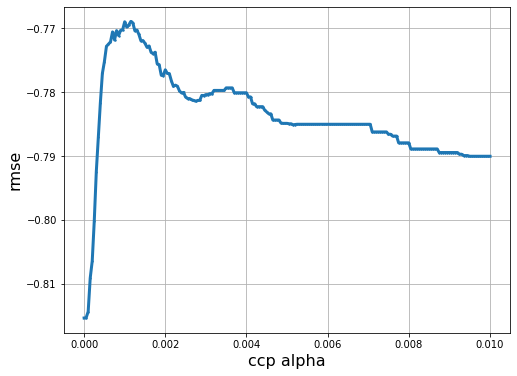

In [11]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('rmse', fontsize=16)
plt.scatter(ccp, rmse, s=2)
plt.plot(ccp, rmse, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [16]:
reg_tree_best_rmse = reg_tree_cv_b2.best_score_
reg_tree_best_rmse

-0.7689782968516233

In [17]:
reg_tree_best_complexity_parameter = b2_df[b2_df['RMSE'] == reg_tree_best_rmse]['ccp alpha'].iloc[0]
reg_tree_best_complexity_parameter

0.00115

## b.iii)

In [10]:
def OSR2_lin(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

def OSR2_tree(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return (1 - SSE/SST)

In [11]:
print('Linear Regression OSR2:', OSR2_lin(model_b1, yelp_train, yelp_test, 'stars'))
print('Linear Regression MAE:', mae(model_b1.predict(yelp_test), y_test))
print('Regression Tree OSR2:', OSR2_tree(reg_tree_cv_b2, x_test, y_test, y_train))
print('Regression Tree MAE:', mae(reg_tree_cv_b2.predict(x_test), y_test))

Linear Regression OSR2: 0.1457737680162715
Linear Regression MAE: 0.6295425742392496
Regression Tree OSR2: 0.15283870936866095
Regression Tree MAE: 0.6160827146252122


## c.i)

In [12]:
yelp_train['fourOrAbove'] = pd.Series([1 if x >= 4 else 0 for x in yelp_train['stars']])
yelp_test['fourOrAbove'] = pd.Series([1 if x >= 4 else 0 for x in yelp_test['stars']])

## d.ii)

In [13]:
lin_pred = model_b1.predict(yelp_test)
lin_pred_0_1 = pd.Series([1 if x >= 4 else 0 for x in lin_pred])

tree_pred = reg_tree_cv_b2.predict(x_test)
tree_pred_0_1 = pd.Series([1 if x >= 4 else 0 for x in tree_pred])

## d.iii)

In [14]:
log_model_d3 = smf.logit(formula = "fourOrAbove ~ review_count + \
                                    C(GoodForKids,Treatment(reference='(Missing)')) + \
                                    C(Alcohol, Treatment(reference='(Missing)')) + \
                                    C(BusinessAcceptsCreditCards,Treatment(reference='(Missing)')) + \
                                    C(WiFi, Treatment(reference='(Missing)')) + \
                                    C(BikeParking,Treatment(reference='(Missing)')) + \
                                    C(ByAppointmentOnly,Treatment(reference='(Missing)')) + \
                                    C(WheelechairAccessible, Treatment(reference='(Missing)')) + \
                                    C(OutdoorSeating,Treatment(reference='(Missing)')) + \
                                    C(RestaurantsReservations, Treatment(reference='(Missing)')) + \
                                    C(DogsAllowed,Treatment(reference='(Missing)')) + \
                                    C(Caters, Treatment(reference='(Missing)'))", data = yelp_train).fit()
log_model_d3.summary()

Optimization terminated successfully.
         Current function value: 0.603049
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.1209
Time:                        01:00:52   Log-Likelihood:                -3782.3
converged:                       True   LL-Null:                       -4302.5
Covariance Type:            nonrobust   LLR p-value:                1.634e-203
============================================================================================================================================
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   -0.4425      0.105     -4.219      0.000      -0.648      -0.237
C(GoodForKids, Treatment(reference='(Missing)'))[T.FALSE]                    0.2585      0.130      1.986      0.047       0.003       0.514
C(GoodForKids, Treatment(reference='(Missing)'))[T.TRUE]                    -0.2006      0.101     -1.977      0.048      -0.400      -0.002
C(Alcohol, Treatment(reference='(Missing)'))[T.'beer_and_wine']              0.3357      0.136      2.463      0.014       0.069       0.603
C(Alcohol, Treatment(reference='(Missing)'))[T.'full_bar']                  -0.0452      0.126     -0.358      0.720      -0.292       0.202
C(Alcohol, Treatment(reference='(Missing)'))[T.'none']                       0.3954      0.113      3.503      0.000       0.174       0.617
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.FALSE]     1.1767      0.259      4.540      0.000       0.669       1.685
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.TRUE]      0.1375      0.124      1.105      0.269      -0.106       0.381
C(WiFi, Treatment(reference='(Missing)'))[T.'free']                          0.2966      0.098      3.025      0.002       0.104       0.489
C(WiFi, Treatment(reference='(Missing)'))[T.'no']                            0.2490      0.094      2.637      0.008       0.064       0.434
C(WiFi, Treatment(reference='(Missing)'))[T.'paid']                         -0.5527      0.325     -1.699      0.089      -1.190       0.085
C(BikeParking, Treatment(reference='(Missing)'))[T.FALSE]                   -0.4221      0.092     -4.609      0.000      -0.602      -0.243
C(BikeParking, Treatment(reference='(Missing)'))[T.TRUE]                    -0.2906      0.081     -3.594      0.000      -0.449      -0.132
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.FALSE]              0.4338      0.098      4.423      0.000       0.242       0.626
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.TRUE]               0.5371      0.308      1.746      0.081      -0.066       1.140
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.FALSE]          1.8650      0.319      5.850      0.000       1.240       2.490
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.TRUE]           0.9883      0.077     12.836      0.000       0.837       1.139
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.FALSE]                -0.4577      0.112     -4.073      0.000      -0.678      -0.237
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.TRUE]                 -0.2323      0.120     -1.943      0.052      -0.467       0.002
C(RestaurantsReservations, Treatment(reference='(Missing)'))[T.FALSE]       -0.4095      0.115     -3.564      0.000      -0.635      -0.18

## d.iv)

In [15]:
x_train_new = pd.get_dummies(yelp_train.iloc[:,1:13])
x_test_new = pd.get_dummies(yelp_test.iloc[:,1:13])
y_train_new = yelp_train['fourOrAbove']
y_test_new = yelp_test['fourOrAbove']

In [16]:
dec_tree = DecisionTreeClassifier()
grid_values_d4 = {'ccp_alpha': np.linspace(0, 0.010, 201),
                  'min_samples_leaf': [5],
                  'min_samples_split': [20],
                  #'max_depth': [30],
                  'random_state': [88]}
  
dec_tree_cv_d4 = GridSearchCV(dec_tree, param_grid = grid_values_d4, cv = 10, verbose = 1) 
dec_tree_cv_d4.fit(x_train_new, y_train_new)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45...
       8.40e-03, 8.45e-03, 8.50e-03, 8.55e-03, 8.60e-03, 8.65e-03,
       8.70e-03, 8.75e-03, 8.80e-03, 8.85e-03, 8.90e-03, 8.95e-03,
       9.00e-03, 9.05e-03, 9.10e-03, 9.15e-03, 9.20e-03, 9.25e-03,
       9.30e-03, 9.35e-03, 9.40e-03, 9.45e-03, 9.50e-03, 9.55e-03,
       9.60e-03, 9.65e-03, 9.70e-03, 9.75e-03, 9.80e-03, 9.85e-03,
       9.90e-03, 9.95e-03, 1.00e-02]),
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             verbose=1)

In [17]:
acc = dec_tree_cv_d4.cv_results_['mean_test_score'] 
ccp = dec_tree_cv_d4.cv_results_['param_ccp_alpha'].data

d4_df = pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc})
d4_df.head(20)

,ccp alpha,Validation Accuracy
0,0.0,0.638715
1,0.00005,0.639034
2,0.0001,0.638396
3,0.00015,0.635048
4,0.0002,0.643338
5,0.00025,0.652745
6,0.0003,0.655135
7,0.00035,0.660398
8,0.0004,0.666295
9,0.00045,0.666614


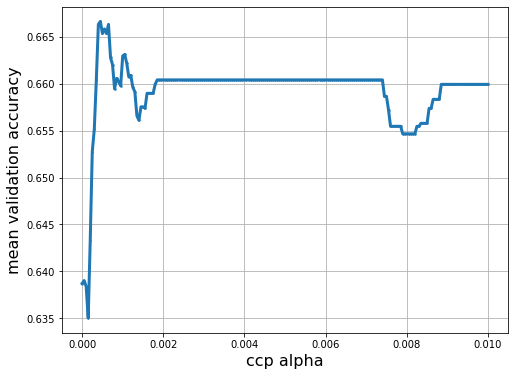

In [18]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [19]:
classification_tree_highest_acc = max(d4_df['Validation Accuracy'])
classification_tree_highest_acc

0.6666140960391715

In [20]:
classification_tree_best_complexity_parameter = d4_df[d4_df['Validation Accuracy'] == classification_tree_highest_acc]['ccp alpha'].iloc[0]
classification_tree_best_complexity_parameter

0.00045000000000000004

## d.v)

In [21]:
## Baseline Model
display(yelp_train['fourOrAbove'].value_counts())

print('The majority of values in the fourOrAbove column is 0')

0    3511
1    2761
Name: fourOrAbove, dtype: int64

The majority of values in the fourOrAbove column is 0


In [22]:
baseline_predictions = pd.Series([0 for x in yelp_test['fourOrAbove']])
print('Baseline Predictions : \n', baseline_predictions.head())
cm_baseline = confusion_matrix(y_test_new, baseline_predictions)
print("Baseline Confusion Matrix : \n", cm_baseline) 
accuracy_baseline = (cm_baseline.ravel()[0] + cm_baseline.ravel()[3]) / sum(cm_baseline.ravel())
print('Baseline Model Accuracy :', accuracy_baseline)
tpr_baseline = cm_baseline.ravel()[3] / (cm_baseline.ravel()[2] + cm_baseline.ravel()[3])
fpr_baseline = cm_baseline.ravel()[1] / (cm_baseline.ravel()[0] + cm_baseline.ravel()[1])
print('Baseline Model TPR :', tpr_baseline,'\nBaseline Model FPR :', fpr_baseline)

Baseline Predictions : 
 0    0
1    0
2    0
3    0
4    0
dtype: int64
Baseline Confusion Matrix : 
 [[1495    0]
 [1193    0]]
Baseline Model Accuracy : 0.5561755952380952
Baseline Model TPR : 0.0 
Baseline Model FPR : 0.0


In [23]:
## Linear Regression Model
lin_reg_predictions_raw = model_b1.predict(yelp_test)
lin_reg_predictions = pd.Series([1 if x >= 4 else 0 for x in lin_reg_predictions_raw])
print('Linear Regression Predictions : \n', lin_reg_predictions.head())
cm_lin_reg = confusion_matrix(y_test_new, lin_reg_predictions)
print("Linear Regression Confusion Matrix : \n", cm_lin_reg) 
accuracy_lin_reg = (cm_lin_reg.ravel()[0] + cm_lin_reg.ravel()[3]) / sum(cm_lin_reg.ravel())
print('Linear Regression Model Accuracy :', accuracy_lin_reg)
tpr_lin_reg = cm_lin_reg.ravel()[3] / (cm_lin_reg.ravel()[2] + cm_lin_reg.ravel()[3])
fpr_lin_reg = cm_lin_reg.ravel()[1] / (cm_lin_reg.ravel()[0] + cm_lin_reg.ravel()[1])
print('Linear Regression Model TPR :', tpr_lin_reg,'\nLinear Regression Model FPR :', fpr_lin_reg)

Linear Regression Predictions : 
 0    0
1    0
2    0
3    0
4    0
dtype: int64
Linear Regression Confusion Matrix : 
 [[1419   76]
 [ 942  251]]
Linear Regression Model Accuracy : 0.6212797619047619
Linear Regression Model TPR : 0.21039396479463537 
Linear Regression Model FPR : 0.050836120401337795


In [24]:
## Regression Tree Model
reg_tree_predictions_raw = reg_tree_cv_b2.best_estimator_.predict(x_test)
reg_tree_predictions = pd.Series([1 if x >= 4 else 0 for x in reg_tree_predictions_raw])
print('Regression Tree Predictions : \n', reg_tree_predictions.head())
cm_reg_tree = confusion_matrix(y_test_new, reg_tree_predictions)
print("Regression Tree Confusion Matrix : \n", cm_reg_tree) 
accuracy_reg_tree = (cm_reg_tree.ravel()[0] + cm_reg_tree.ravel()[3]) / sum(cm_reg_tree.ravel())
print('Regression Tree Model Accuracy :', accuracy_reg_tree)
tpr_reg_tree = cm_reg_tree.ravel()[3] / (cm_reg_tree.ravel()[2] + cm_reg_tree.ravel()[3])
fpr_reg_tree = cm_reg_tree.ravel()[1] / (cm_reg_tree.ravel()[0] + cm_reg_tree.ravel()[1])
print('Regression Tree Model TPR :', tpr_reg_tree,'\nRegression Tree Model FPR :', fpr_reg_tree)

Regression Tree Predictions : 
 0    0
1    0
2    0
3    0
4    0
dtype: int64
Regression Tree Confusion Matrix : 
 [[1445   50]
 [1005  188]]
Regression Tree Model Accuracy : 0.6075148809523809
Regression Tree Model TPR : 0.15758591785414922 
Regression Tree Model FPR : 0.033444816053511704


In [25]:
## Logistic Regression Model
log_model_predictions_raw = log_model_d3.predict(yelp_test)
log_model_predictions = pd.Series([1 if x > 0.5 else 0 for x in log_model_predictions_raw])
print('Logistic Regression Predictions : \n', log_model_predictions.head())
cm_log_reg = confusion_matrix(y_test_new, log_model_predictions)
print ("Logistic Regression Confusion Matrix : \n", cm_log_reg) 
accuracy_log_reg = (cm_log_reg.ravel()[0] + cm_log_reg.ravel()[3]) / sum(cm_log_reg.ravel())
print('Logistic Regression Accuracy :', accuracy_log_reg)
tpr_log_reg = cm_log_reg.ravel()[3] / (cm_log_reg.ravel()[2] + cm_log_reg.ravel()[3])
fpr_log_reg = cm_log_reg.ravel()[1] / (cm_log_reg.ravel()[0] + cm_log_reg.ravel()[1])
print('Logistic Regression Accuracy TPR :', tpr_log_reg,'\nLogistic Regression Accuracy FPR :', fpr_log_reg)

Logistic Regression Predictions : 
 0    0
1    0
2    1
3    0
4    1
dtype: int64
Logistic Regression Confusion Matrix : 
 [[1177  318]
 [ 610  583]]
Logistic Regression Accuracy : 0.6547619047619048
Logistic Regression Accuracy TPR : 0.4886839899413244 
Logistic Regression Accuracy FPR : 0.21270903010033446


In [26]:
## Classification Tree Model
dec_tree_predictions = dec_tree_cv_d4.best_estimator_.predict(x_test)
dec_tree_predictions = pd.Series(dec_tree_predictions)
print('Classification Tree Predictions : \n', dec_tree_predictions.head())
cm_dec_tree = confusion_matrix(y_test_new, dec_tree_predictions)
print ("Classification Tree Confusion Matrix : \n", cm_dec_tree) 
accuracy_dec_tree = (cm_dec_tree.ravel()[0] + cm_dec_tree.ravel()[3]) / sum(cm_dec_tree.ravel())
print('Classification Tree Accuracy :', accuracy_dec_tree)
tpr_dec_tree = cm_dec_tree.ravel()[3] / (cm_dec_tree.ravel()[2] + cm_dec_tree.ravel()[3])
fpr_dec_tree = cm_dec_tree.ravel()[1] / (cm_dec_tree.ravel()[0] + cm_dec_tree.ravel()[1])
print('Classification Tree TPR :', tpr_dec_tree,'\nClassification Tree FPR :', fpr_dec_tree)

Classification Tree Predictions : 
 0    0
1    0
2    1
3    0
4    0
dtype: int64
Classification Tree Confusion Matrix : 
 [[1212  283]
 [ 615  578]]
Classification Tree Accuracy : 0.6659226190476191
Classification Tree TPR : 0.4844928751047779 
Classification Tree FPR : 0.18929765886287625


In [49]:
data = { 
        'Accuracy':[accuracy_baseline, accuracy_lin_reg, accuracy_reg_tree, accuracy_log_reg, accuracy_dec_tree], 
        'TPR':[tpr_baseline, tpr_lin_reg, tpr_reg_tree, tpr_log_reg, tpr_dec_tree], 
        'FPR':[fpr_baseline, fpr_lin_reg, fpr_reg_tree, fpr_log_reg, fpr_dec_tree]}
df = pd.DataFrame(data, index = ['Baseline', 'Linear Regression', 'Regression Tree', 'Logistic Regression', 'Classification Tree'])
df

,Accuracy,TPR,FPR
Baseline,0.556176,0.000000,0.000000
Linear Regression,0.621280,0.210394,0.050836
Regression Tree,0.607515,0.157586,0.033445
Logistic Regression,0.654762,0.488684,0.212709
Classification Tree,0.665923,0.484493,0.189298


## e)

In [28]:
## Tip 1
combined_data = pd.concat([yelp_train, yelp_test])
nan_data = combined_data.replace('(Missing)', np.nan)
nan_data['missing_counts'] = nan_data.isnull().sum(axis = 1)

In [29]:
three_cols = nan_data[['stars', 'review_count', 'missing_counts']]
three_cols.groupby('stars').mean().reset_index().drop(columns = {'review_count'})

,stars,missing_counts
0,1.0,8.789474
1,1.5,6.177778
2,2.0,5.617801
3,2.5,5.235676
4,3.0,4.947143
5,3.5,4.415820
6,4.0,3.935721
7,4.5,4.012950
8,5.0,6.012953


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


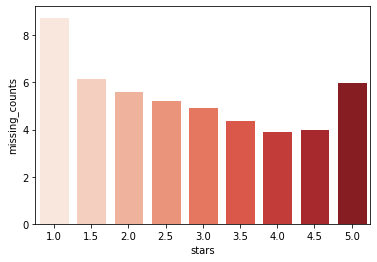

In [30]:
sns.barplot(three_cols['stars'], three_cols['missing_counts'], palette = 'Reds', edgecolor = 'w', ci=None);
plt.show();

In [31]:
## Tip 2
nan_data_1_0 = nan_data.replace('TRUE',1)
nan_data_1_0 = nan_data_1_0.replace('FALSE', 0)

In [32]:
stars_alcohol = nan_data[['stars', 'Alcohol']].replace("'none'", np.nan)
stars_alcohol['alcohol_served'] = ~stars_alcohol['Alcohol'].isna()
stars_alcohol['alcohol_served'] = stars_alcohol['alcohol_served'].astype(int)
stars_alcohol = stars_alcohol.drop(columns = {'Alcohol'})
print("Proportion of non-missing values from 'Alcohol' column:",sum(~nan_data_1_0['Alcohol'].isna()) / len(stars_alcohol))

Proportion of non-missing values from 'Alcohol' column: 0.6556919642857143


In [33]:
total_restaurants_by_stars = stars_alcohol.groupby('stars').count().reset_index()['alcohol_served']
total_restaurants_serving_alc = stars_alcohol.groupby('stars').sum().reset_index()['alcohol_served']
prop_serving_alc = total_restaurants_serving_alc / total_restaurants_by_stars
star_to_alc_served = stars_alcohol.groupby('stars').count().reset_index().drop(columns = {'alcohol_served'})
star_to_alc_served['proportion_serving_alcohol'] = prop_serving_alc
star_to_alc_served

,stars,proportion_serving_alcohol
0,1.0,0.035088
1,1.5,0.094444
2,2.0,0.068063
3,2.5,0.198919
4,3.0,0.369286
5,3.5,0.424372
6,4.0,0.413223
7,4.5,0.307194
8,5.0,0.121762


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


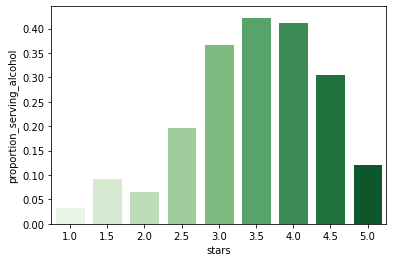

In [34]:
sns.barplot('stars', 'proportion_serving_alcohol', data = star_to_alc_served, palette = 'Greens', edgecolor = 'w', ci=None);
plt.show();

In [35]:
stars_alc_dropped = nan_data[['stars', 'Alcohol']].dropna()
stars_alc_dropped = stars_alc_dropped.replace("'none'", np.nan)
stars_alc_dropped['alcohol_served'] = (~stars_alc_dropped.isna())['Alcohol']
stars_alc_dropped = stars_alc_dropped.drop(columns = {'Alcohol'})
total_res = stars_alc_dropped.groupby('stars').count().reset_index()['alcohol_served']
serving_alc = stars_alc_dropped.groupby('stars').sum().reset_index()['alcohol_served']
prop_serving_alc = serving_alc / total_res
star_to_alc_served_dropped = stars_alc_dropped.groupby('stars').count().reset_index().drop(columns = {'alcohol_served'})
star_to_alc_served_dropped['proportion_serving_alcohol'] = prop_serving_alc
star_to_alc_served_dropped

,stars,proportion_serving_alcohol
0,1.0,0.333333
1,1.5,0.188889
2,2.0,0.127451
3,2.5,0.327402
4,3.0,0.568757
5,3.5,0.589896
6,4.0,0.562852
7,4.5,0.466157
8,5.0,0.333333


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


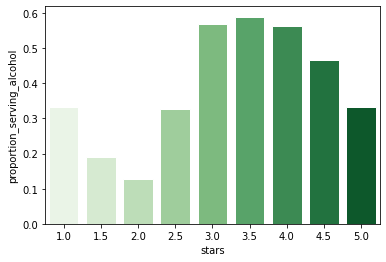

In [36]:
sns.barplot('stars', 'proportion_serving_alcohol', data = star_to_alc_served_dropped, palette = 'Greens', edgecolor = 'w', ci=None);
plt.show();

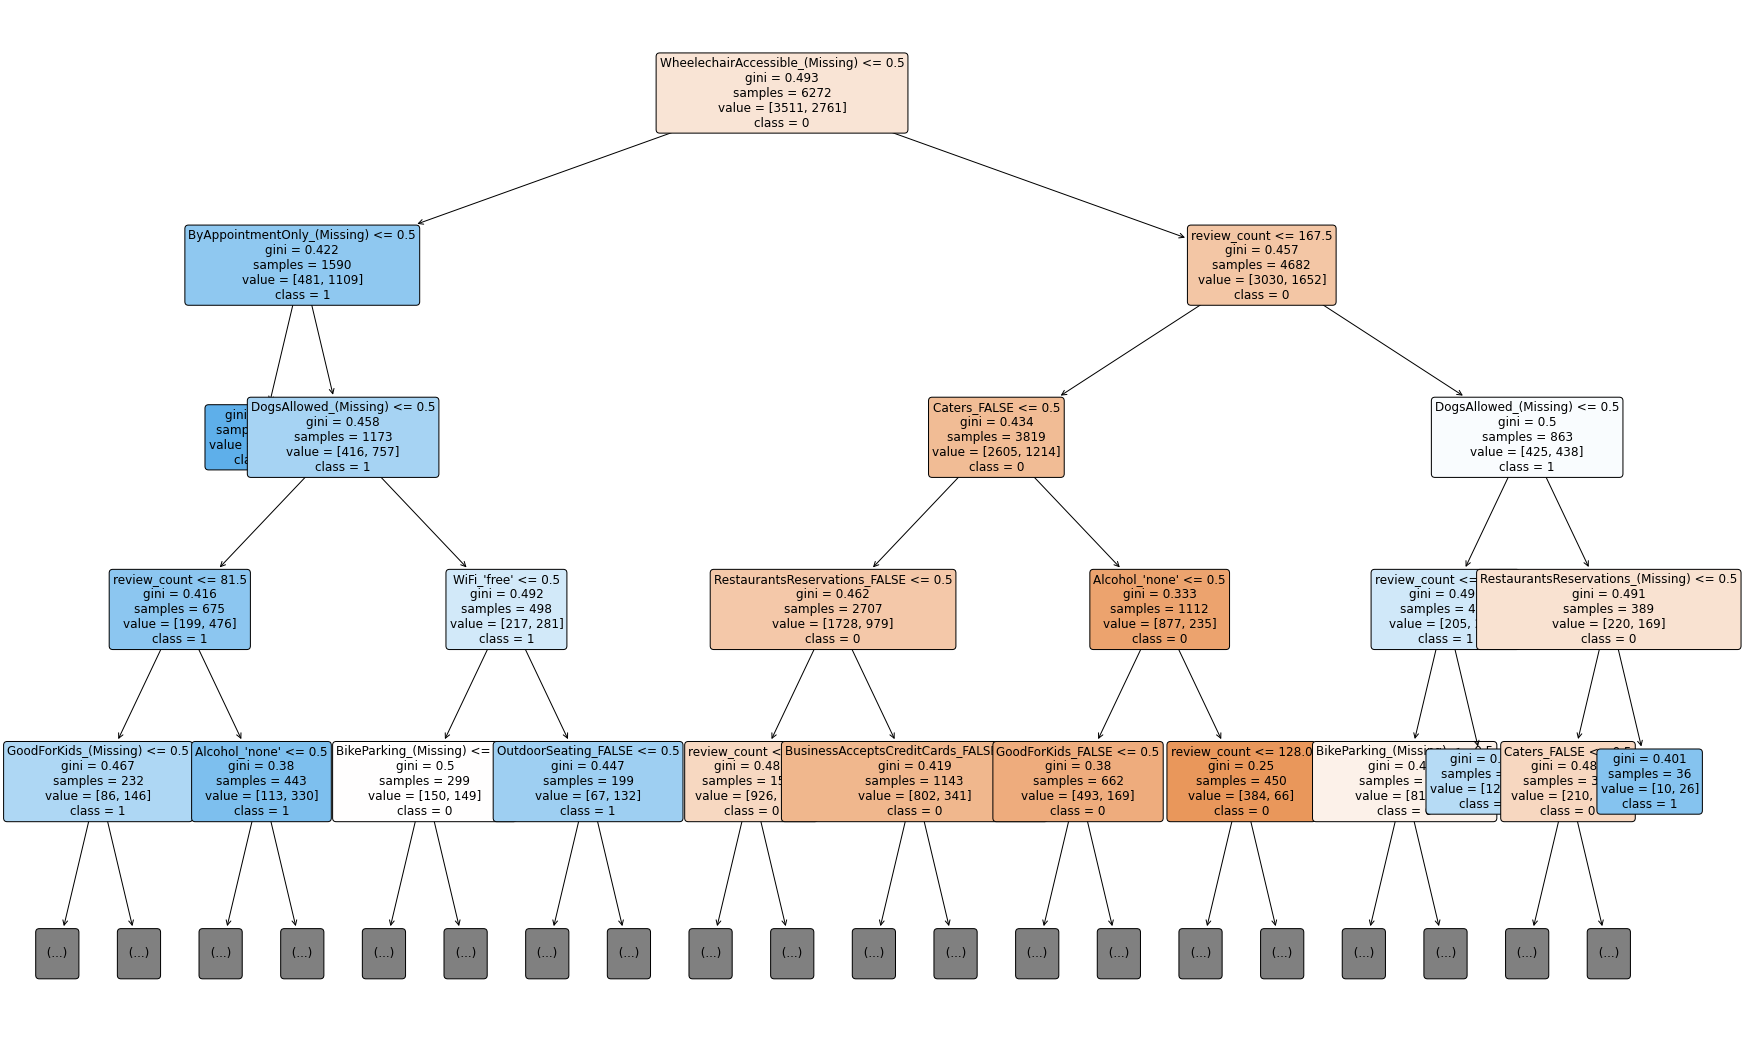

In [37]:
## Tip 3

plt.figure(figsize=(30,19));
plot_tree(dec_tree_cv_d4.best_estimator_, 
          feature_names=x_train_new.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=4);

In [38]:
print("Proportion of non-missing values from 'RestaurantsReservations' column:", (~nan_data['RestaurantsReservations'].isnull()).sum()/len(nan_data))

Proportion of non-missing values from 'RestaurantsReservations' column: 0.6840401785714286


In [39]:
stars_res = nan_data_1_0[['stars','RestaurantsReservations']]
prop_yes = stars_res.groupby('stars').sum().reset_index()['RestaurantsReservations']
total_res = stars_res.groupby('stars').count().reset_index()['RestaurantsReservations']
prop_res = prop_yes/total_res
res_df = stars_res.groupby('stars').count().reset_index().drop(columns = {'RestaurantsReservations'})
res_df['proportion_with_reservation_option'] = prop_res
res_df

,stars,proportion_with_reservation_option
0,1.0,0.166667
1,1.5,0.034783
2,2.0,0.081081
3,2.5,0.165289
4,3.0,0.286458
5,3.5,0.392704
6,4.0,0.429104
7,4.5,0.442117
8,5.0,0.409091


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


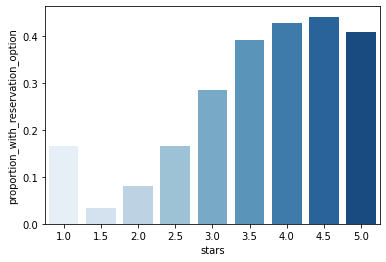

In [40]:
sns.barplot('stars', 'proportion_with_reservation_option', data = res_df, palette = 'Blues');

In [54]:
nan_data.isna().sum().sum()

41334

In [59]:
temp_data = nan_data.drop(columns = {'fourOrAbove', 'missing_counts'})
(~temp_data.isna()).sum().sum()

75146

In [62]:
temp_data

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.0,53,TRUE,NaN,TRUE,'free',TRUE,NaN,NaN,FALSE,TRUE,NaN,NaN
1,5.0,6,NaN,NaN,TRUE,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN
2,2.5,7,NaN,NaN,TRUE,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
3,3.5,73,TRUE,'none',TRUE,'no',TRUE,NaN,TRUE,FALSE,FALSE,NaN,TRUE
4,4.0,203,TRUE,'beer_and_wine',TRUE,'free',TRUE,NaN,TRUE,TRUE,FALSE,NaN,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,3.5,40,NaN,NaN,TRUE,NaN,TRUE,NaN,TRUE,NaN,NaN,NaN,FALSE
2684,3.5,36,FALSE,'full_bar',TRUE,'no',TRUE,NaN,TRUE,FALSE,TRUE,NaN,FALSE
2685,3.5,285,TRUE,'beer_and_wine',TRUE,'free',TRUE,NaN,NaN,TRUE,FALSE,NaN,FALSE
2686,3.5,177,NaN,NaN,TRUE,'no',TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [63]:
8960*13

116480

In [64]:
41334/116480

0.3548592032967033